In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

# Load the dataset
dataset = pd.read_csv('RFMiD_Training_Labels.csv')  

# Features and target
X = dataset.drop(columns=['ID', 'Disease_Risk'])  # Features (excluding ID and target)
y = dataset['Disease_Risk']  # Target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a classifier (Random Forest in this case)
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Make predictions on training and test data
y_train_pred = classifier.predict(X_train)
y_test_pred = classifier.predict(X_test)

# Evaluate the confusion matrix and performance metrics
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Print confusion matrix and classification report
print("=== Confusion Matrix - Training Data ===")
print(conf_matrix_train)
print("\n=== Classification Report - Training Data ===")
print(classification_report(y_train, y_train_pred))

print("=== Confusion Matrix - Test Data ===")
print(conf_matrix_test)
print("\n=== Classification Report - Test Data ===")
print(classification_report(y_test, y_test_pred))

# Infer learning outcome
if (conf_matrix_train[0][0] + conf_matrix_train[1][1]) > (conf_matrix_test[0][0] + conf_matrix_test[1][1]):
    print("\nThe model may be overfitting.")
elif (conf_matrix_train[0][0] + conf_matrix_train[1][1]) < (conf_matrix_test[0][0] + conf_matrix_test[1][1]):
    print("\nThe model may be underfitting.")
else:
    print("\nThe model is fitting well (regular fit).")


=== Confusion Matrix - Training Data ===
[[ 282    0]
 [   0 1062]]

=== Classification Report - Training Data ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       282
           1       1.00      1.00      1.00      1062

    accuracy                           1.00      1344
   macro avg       1.00      1.00      1.00      1344
weighted avg       1.00      1.00      1.00      1344

=== Confusion Matrix - Test Data ===
[[119   0]
 [  6 451]]

=== Classification Report - Test Data ===
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       119
           1       1.00      0.99      0.99       457

    accuracy                           0.99       576
   macro avg       0.98      0.99      0.98       576
weighted avg       0.99      0.99      0.99       576


The model may be overfitting.


In [2]:
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Load the dataset from Excel
dataset = pd.read_excel('Lab Session Data.xlsx', sheet_name='IRCTC Stock Price')

# Extract relevant columns
# Assuming 'Price' is the actual price we want to predict and 'Open' is our predicted price for this example
y_true = dataset['Price']  # Actual prices
y_pred = dataset['Open']   # Predicted prices (you can replace this with your actual predictions)

# Calculate MSE
mse = mean_squared_error(y_true, y_pred)

# Calculate RMSE
rmse = np.sqrt(mse)

# Calculate MAPE
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate R² score
r2 = r2_score(y_true, y_pred)

# Print the results
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')
print(f'R² Score: {r2}')

Mean Squared Error (MSE): 1216.5916465863456
Root Mean Squared Error (RMSE): 34.87967383142144
Mean Absolute Percentage Error (MAPE): 1.3949810885242826%
R² Score: 0.9792023145886852


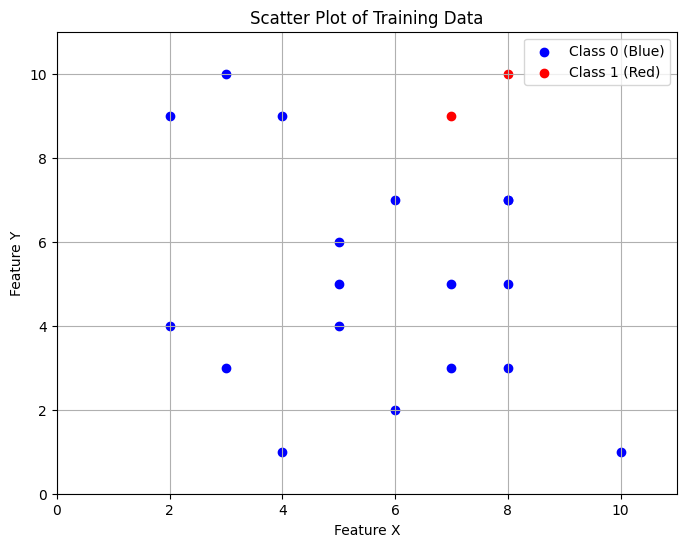

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random data points
np.random.seed(42)  # For reproducibility
X = np.random.randint(1, 11, size=20)
Y = np.random.randint(1, 11, size=20)

# Assign classes based on some condition (you can change the condition as needed)
class0 = (X + Y) <= 15  # Condition for class0 (Blue)
class1 = ~class0        # Class1 (Red)

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X[class0], Y[class0], color='blue', label='Class 0 (Blue)')
plt.scatter(X[class1], Y[class1], color='red', label='Class 1 (Red)')
plt.title('Scatter Plot of Training Data')
plt.xlabel('Feature X')
plt.ylabel('Feature Y')
plt.legend()
plt.xlim(0, 11)
plt.ylim(0, 11)
plt.grid()
plt.show()


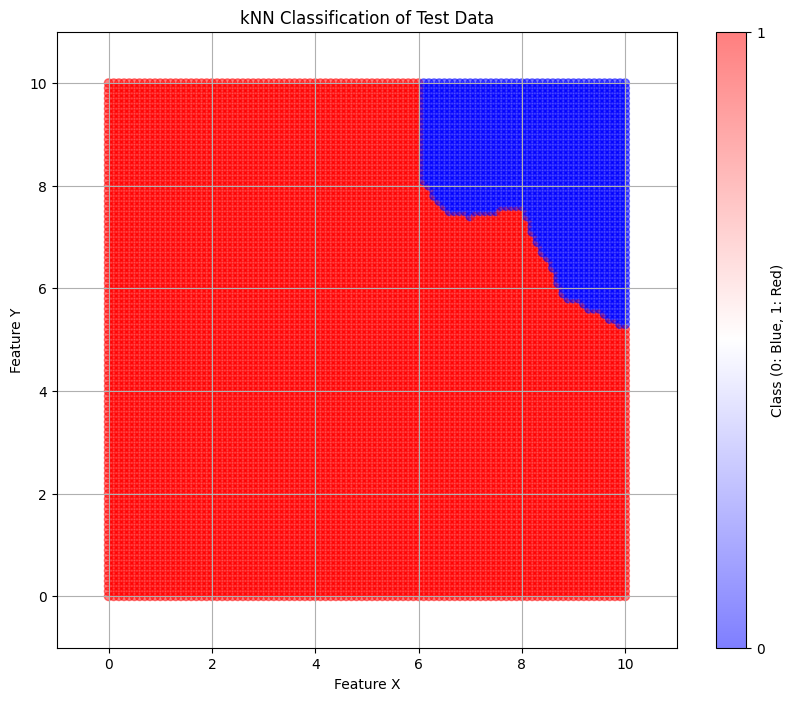

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Generate training data
np.random.seed(42)
X_train = np.random.randint(1, 11, size=(20, 2))
Y_train = np.array([(1 if (x + y) <= 15 else 0) for x, y in X_train])

# Generate test data
x_test = np.arange(0, 10.1, 0.1)
y_test = np.arange(0, 10.1, 0.1)
X_test = np.array(np.meshgrid(x_test, y_test)).T.reshape(-1, 2)

# Train kNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)

# Predict classes for test data
Y_pred = knn.predict(X_test)

# Create scatter plot for test data output
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_pred, cmap=plt.cm.bwr, alpha=0.5)
plt.title('kNN Classification of Test Data')
plt.xlabel('Feature X')
plt.ylabel('Feature Y')
plt.xlim(-1, 11)
plt.ylim(-1, 11)
plt.colorbar(scatter, ticks=[0, 1], label='Class (0: Blue, 1: Red)')
plt.grid()
plt.show()


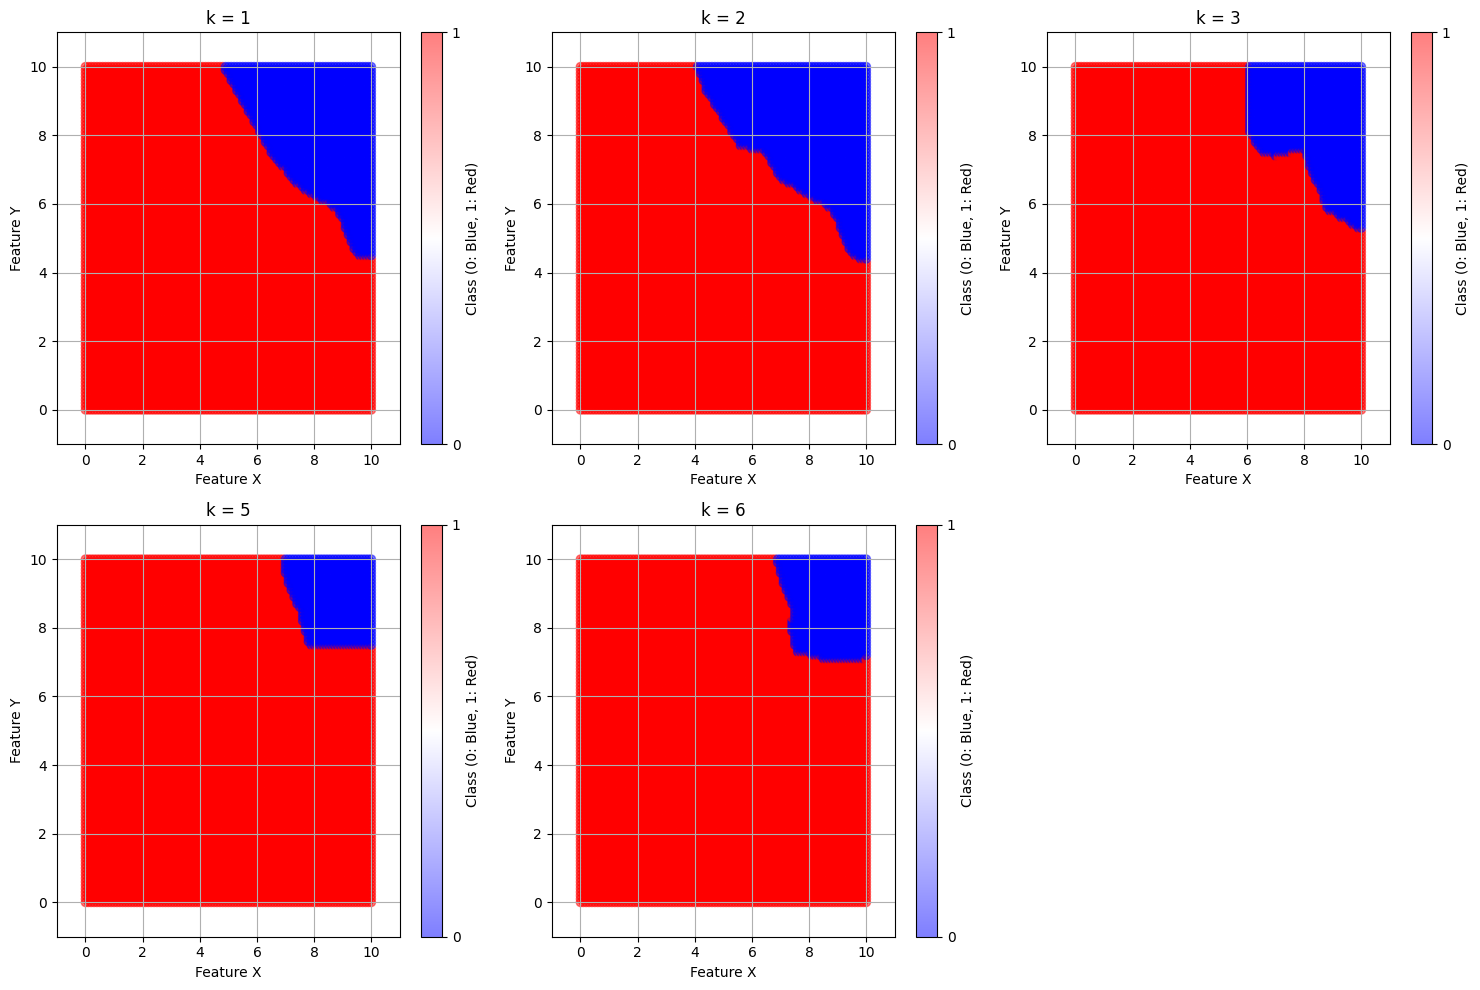

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Generate training data
np.random.seed(42)
X_train = np.random.randint(1, 11, size=(20, 2))
Y_train = np.array([(1 if (x + y) <= 15 else 0) for x, y in X_train])

# Generate test data
x_test = np.arange(0, 10.1, 0.1)
y_test = np.arange(0, 10.1, 0.1)
X_test = np.array(np.meshgrid(x_test, y_test)).T.reshape(-1, 2)

# Values of k to test
k_values = [1, 2 ,3, 5, 6]

# Create a figure for subplots
plt.figure(figsize=(15, 10))

for i, k in enumerate(k_values):
    # Train kNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)

    # Predict classes for test data
    Y_pred = knn.predict(X_test)

    # Create scatter plot for test data output
    plt.subplot(2, 3, i + 1)
    scatter = plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_pred, cmap=plt.cm.bwr, alpha=0.5)
    plt.title(f'k = {k}')
    plt.xlabel('Feature X')
    plt.ylabel('Feature Y')
    plt.xlim(-1, 11)
    plt.ylim(-1, 11)
    plt.colorbar(scatter, ticks=[0, 1], label='Class (0: Blue, 1: Red)')
    plt.grid()

plt.tight_layout()
plt.show()


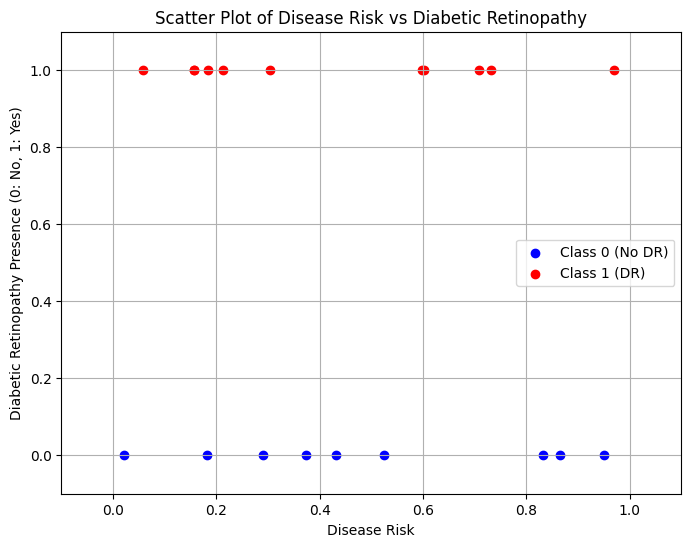

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Simulated data points based on RFMiD dataset features
np.random.seed(42)  # For reproducibility
# Simulating Disease Risk scores between 0 and 1
Disease_Risk = np.random.rand(20)
# Simulating Diabetic Retinopathy presence (0 or 1)
DR = np.random.randint(0, 2, size=20)

# Assign classes based on the presence of Diabetic Retinopathy
class0 = DR == 0  # Class 0 (No Diabetic Retinopathy)
class1 = DR == 1  # Class 1 (Diabetic Retinopathy)

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(Disease_Risk[class0], DR[class0], color='blue', label='Class 0 (No DR)')
plt.scatter(Disease_Risk[class1], DR[class1], color='red', label='Class 1 (DR)')
plt.title('Scatter Plot of Disease Risk vs Diabetic Retinopathy')
plt.xlabel('Disease Risk')
plt.ylabel('Diabetic Retinopathy Presence (0: No, 1: Yes)')
plt.legend()
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)
plt.savefig('Scatter_Plot_Disease_Risk_and_DR.jpg', dpi=300)  # Adjust filename and dpi as needed

plt.grid()
plt.show()

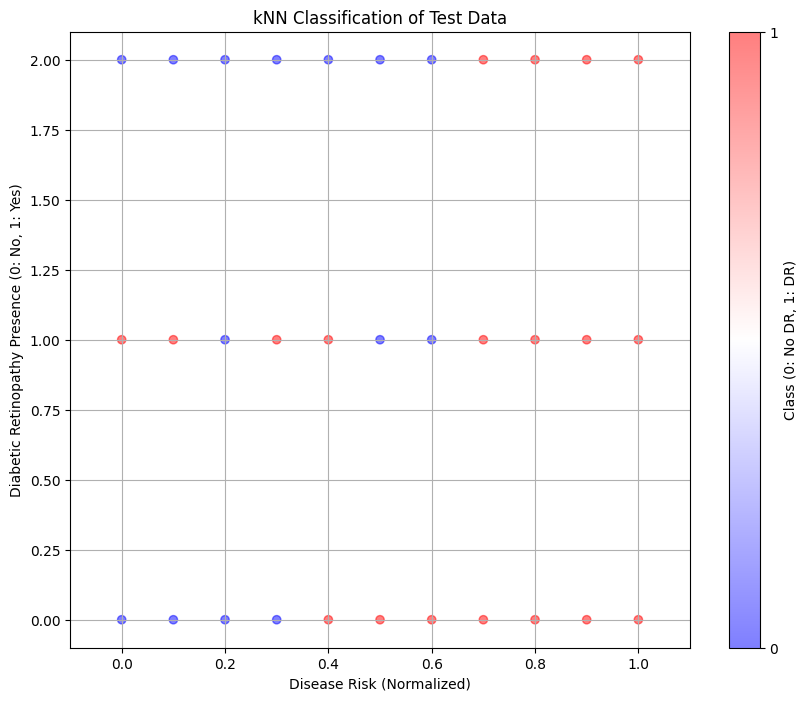

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Simulated training data based on RFMiD dataset features
np.random.seed(42)

# Generate random training data: Disease Risk (feature 1) and Diabetic Retinopathy presence (feature 2)
# Here we simulate Disease Risk between 0 and 1 and DR as binary (0 or 1)
X_train = np.random.rand(20, 2)  # 20 samples with 2 features (Disease Risk, DR)
Y_train = np.array([(1 if dr == 1 else 0) for dr in np.random.randint(0, 2, size=20)])  # Class based on DR presence

# Generate test data for predictions
x_test = np.arange(0, 1.1, 0.1)  # Range for Disease Risk
y_test = np.arange(0, 2.1, 1)     # Range for Diabetic Retinopathy presence (0 or 1)
X_test = np.array(np.meshgrid(x_test, y_test)).T.reshape(-1, 2)

# Train kNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)

# Predict classes for test data
Y_pred = knn.predict(X_test)

# Create scatter plot for test data output
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_pred, cmap=plt.cm.bwr, alpha=0.5)
plt.title('kNN Classification of Test Data')
plt.xlabel('Disease Risk (Normalized)')
plt.ylabel('Diabetic Retinopathy Presence (0: No, 1: Yes)')
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 2.1)
plt.colorbar(scatter, ticks=[0, 1], label='Class (0: No DR, 1: DR)')
plt.savefig('KNN_Classification(3).jpg', dpi=300)  # Adjust filename and dpi as needed

plt.grid()
plt.show()

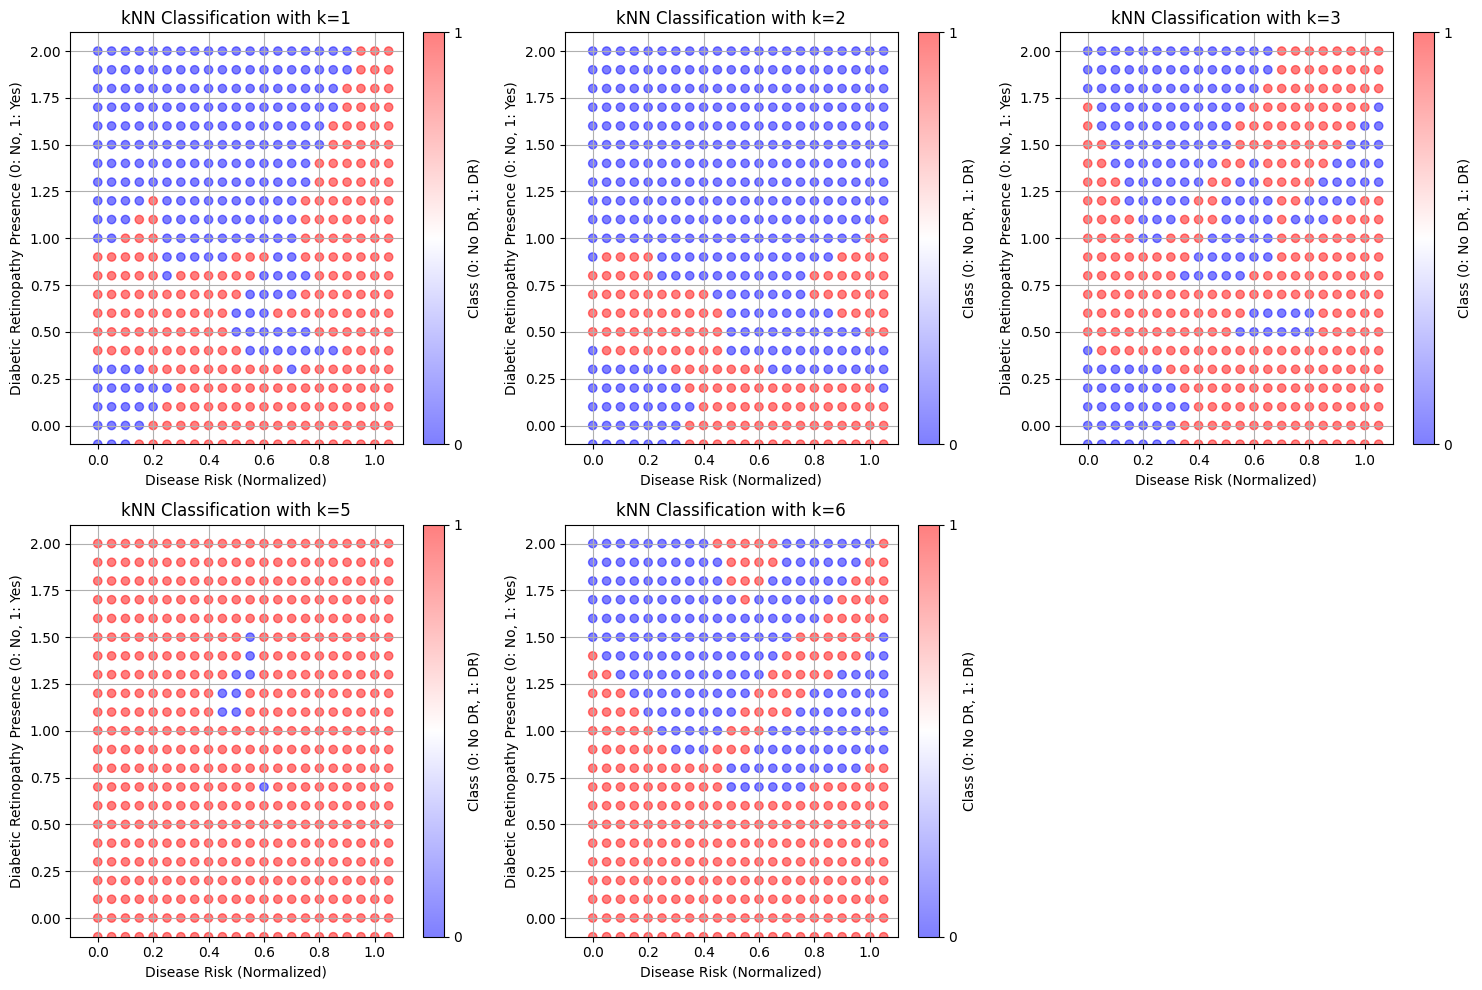

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Set random seed for reproducibility
np.random.seed(42)

# Generate random training data: Disease Risk (feature 1) and Diabetic Retinopathy presence (feature 2)
X_train = np.random.rand(20, 2)  # 20 samples with 2 features (Disease Risk, DR)
Y_train = np.array([(1 if dr == 1 else 0) for dr in np.random.randint(0, 2, size=20)])  # Class based on DR presence

# Generate test data for predictions
x_test = np.arange(0, 1.1, 0.05)  # Range for Disease Risk
y_test = np.arange(-0.1, 2.1, 0.1) # Range for Diabetic Retinopathy presence (0 or 1)
X_test = np.array(np.meshgrid(x_test, y_test)).T.reshape(-1, 2)

# List of k values to evaluate
k_values = [1, 2, 3, 5, 6]

# Set up the plot
plt.figure(figsize=(15, 10))

for i, k in enumerate(k_values):
    # Train kNN classifier with current k value
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)

    # Predict classes for test data
    Y_pred = knn.predict(X_test)

    # Create scatter plot for test data output
    plt.subplot(2, 3, i + 1)
    scatter = plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_pred, cmap=plt.cm.bwr, alpha=0.5)
    plt.title(f'kNN Classification with k={k}')
    plt.xlabel('Disease Risk (Normalized)')
    plt.ylabel('Diabetic Retinopathy Presence (0: No, 1: Yes)')
    plt.xlim(-0.1, 1.1)
    plt.ylim(-0.1, 2.1)
    plt.colorbar(scatter, ticks=[0, 1], label='Class (0: No DR, 1: DR)')
    plt.savefig('KNN_Classification(Range).jpg', dpi=300)  # Adjust filename and dpi as needed

    plt.grid()

plt.tight_layout()
plt.show()

In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load your RFMiD dataset
dataset = pd.read_csv('RFMiD_Training_Labels.csv')

# Assuming the dataset contains 'Disease_Risk' and another feature, e.g., 'DR' (Diabetic Retinopathy)
# Adjust the column names based on your actual dataset structure
X = dataset[['DR', 'Disease_Risk']].values  # Features: DR and Disease Risk
Y = dataset['Disease_Risk'].values  # Target variable: Disease Risk

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Hyperparameter tuning with GridSearchCV
param_grid = {'n_neighbors': [1, 2, 3, 5, 6]}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(f'Best k value: {grid_search.best_params_["n_neighbors"]}')



Best k value: 1
